# Data Exploration for Mews Systems Internship 
### Ostap Orishko

In [2]:
import pandas as pd
import numpy as np 

data = pd.read_csv('Dataset_Internship_Exercise.csv')

I'll start with having a look at how data is structured and whether there is any cleaning that needs to be done

In [3]:
data.head()

,Hotel Name,Management Firm,City,State,Country,Chain_Name,Rooms
0,24 North Hotel,Too Low Hotel Management,Key West,Florida,United States,Independent,145
1,24 North Hotel Key West,Too Low Hotel Management,Key West,Florida,United States,Independent,145
2,A La Carte,Multiple Hotels Company,San Diego,California,United States,Hilton,202
3,AC Denver Downtown,Black Group Hospitality,Denver,Colorado,United States,Marriott,223
4,AC Hotel Atlanta Buckhead at Phipps Plaza,Multiple Hotels Company,Atlanta,Georgia,United States,Marriott,166


In [6]:
data['Country'].unique()

array(['United States', 'United Kingdom', 'Netherlands', 'Kazakhstan',
       'Russia', 'Bosnia and Herzegovina', 'Belgium', 'Ireland',
       'Belarus', 'Armenia'], dtype=object)

I'll filter by Country later to include United States only

In [8]:
data['Management Firm'].unique()

array(['Too Low Hotel Management', 'Multiple Hotels Company ',
       'Black Group Hospitality ', 'Flying hospitality company',
       'Painless Hotels Firm ', 'Isolated Hospitality ',
       'Transparent Hotels', 'Best Hospitality Managemnt LTD ',
       'Jamming hospitality ', 'Phillip Hotels', 'Circle Hotels',
       'Goliath hotels and resorts ', 'Hairydry Hotels',
       'Sunny management ', 'best hspitality management ',
       'Best mgnt LDT ', 'best Hospitality Managemnt LTD ', 'Einstein ',
       'Einstein Hotels ', 'Einstein h', 'Einstein Hotel ',
       'Flying Hospitality ', 'jamming hospitality corporation ',
       'jamming hospitality management firm ', 'flYING ',
       'Transparent Hotel'], dtype=object)

There are plenty of mistakes here, I am fixing them below

In [15]:
data['Chain_Name'].unique()

array(['Independent', 'Hilton', 'Marriott', 'IHG', 'Wyndham Destinations',
       nan, 'Best Western Hotels & Resorts', 'Choice Hotels', 'Radisson',
       'Mariot', 'Extended Stay America', 'Hilton hotels', 'Red Lion',
       'Hyatt', 'Accor Hotels', 'Indepantdent', 'Radisson Hospitality',
       'Wyndham Hotels and Resorts'], dtype=object)

Wyndham has two different names: Wyndham Destinations and Wyndham Hotels and Resorts
but Wyndham Hotels and Resorts only appears once - in the UK, so will not be considered

In [23]:
#fixing values for hotel companies 
for col in data.columns:
    #Best Hospitality Management
    data.loc[data[col] == 'best hspitality management ', col] = 'Best Hospitality Management'
    data.loc[data[col] == 'best Hospitality Managemnt LTD ', col] = 'Best Hospitality Management'
    data.loc[data[col] == 'Best Hospitality Managemnt LTD ', col] = 'Best Hospitality Management'
    data.loc[data[col] == 'Best mgnt LDT ', col] = 'Best Hospitality Management'
    
    #Einstein Hotels
    data.loc[data[col] == 'Einstein ', col] = 'Einstein Hotels'
    data.loc[data[col] == 'Einstein h', col] = 'Einstein Hotels'
    data.loc[data[col] == 'Einstein Hotels ', col] = 'Einstein Hotels'
    data.loc[data[col] == 'Einstein Hotel ', col] = 'Einstein Hotels'
    
    #Transparent Hotels
    data.loc[data[col] == 'Transparent Hotel', col] = 'Transparent Hotels'
    
    #Jamming Hospitality
    data.loc[data[col] == 'jamming hospitality management firm ', col] = 'Jamming Hospitality'
    data.loc[data[col] == 'Jamming hospitality ', col] = 'Jamming Hospitality'
    data.loc[data[col] == 'jamming hospitality management firm ', col] = 'Jamming Hospitality'
    data.loc[data[col] == 'jamming hospitality corporation ', col] = 'Jamming Hospitality'
    
    #Goliath Hotels and Resorts
    data.loc[data[col] == 'Goliath hotels and resorts ', col] = 'Goliath Hotels and Resorts'
    
    #Flying Hospitality
    data.loc[data[col] == 'flYING ', col] = 'Flying Hospitality'
    data.loc[data[col] == 'Flying hospitality company', col] = 'Flying Hospitality'
    data.loc[data[col] == 'Flying Hospitality ', col] = 'Flying Hospitality'
    
    #Painless Hotels
    data.loc[data[col] == 'Painless Hotels Firm ', col] = 'Painless Hotels'
    
    #Sunny Management
    data.loc[data[col] == 'Sunny management ', col] = 'Sunny Management'
    
    #strip should do these but once I'm here already I fixed them here 
    data.loc[data[col] == 'Isolated Hospitality ', col] = 'Isolated Hospitality'
    data.loc[data[col] == 'Multiple Hotels Company ', col] = 'Multiple Hotels Company'
    

After this, when we run the cell below we want to get 15 as an answer - the number of Management Firms

In [25]:
len(data['Management Firm'].unique())

15

In [26]:
#removing all countries apart from the US
us_data = data.loc[data['Country'] == 'United States']

len(us_data)

The line below gives us Wyndham hotels **outside** of the US, which are most likely HotelSofts' current customers. Note that both hotels are **managed by Multiple Hotels Company**, which is something we want to consider when looking at the US hotels. 

In [45]:
data.loc[(('Wyndham Destinations' == data['Chain_Name']) | ('Wyndham Hotels and Resorts' == data['Chain_Name'])) & ('United States' != data['Country'])] 

,Hotel Name,Management Firm,City,State,Country,Chain_Name,Rooms
385,Days Inn Liverpool City Centre,Multiple Hotels Company,Liverpool,England,United Kingdom,Wyndham Destinations,154
1491,Ramada Encore Bournemouth,Multiple Hotels Company,Bournemouth,England,United Kingdom,Wyndham Hotels and Resorts,113



We see that there only two hotels - both with *over a hundred rooms*, so Bob should be comfortable approaching 
companies that have hotels in the US run by Wyndham and have fewer that a hundred rooms or so. Finally, we want to see the list of Management Firms that manage hotels of the chain Wyndham. The list is displayed below.


In [51]:
final = us_data.loc[('Wyndham Destinations' == us_data['Chain_Name']) | ('Wyndham Hotels and Resorts' == us_data['Chain_Name'])]
final

,Hotel Name,Management Firm,City,State,Country,Chain_Name,Rooms
49,Americinn By Wyndham Appleton West,Best Hospitality Management,Appleton,Wisconsin,United States,Wyndham Destinations,63
50,Americinn By Wyndham Davenport,Best Hospitality Management,Davenport,Iowa,United States,Wyndham Destinations,62
51,Americinn By Wyndham Hudson,Best Hospitality Management,Hudson,Wisconsin,United States,Wyndham Destinations,63
52,Americinn By Wyndham Moline Airport/Quad Cities,Best Hospitality Management,Moline,Illinois,United States,Wyndham Destinations,63
65,Baymont By Wyndham Coon Rapids,Best Hospitality Management,Coon Rapids,Minnesota,United States,Wyndham Destinations,59
66,Baymont Inn & Suites Barstow Historic Route 66,Sunny Management,Barstow,California,United States,Wyndham Destinations,64
67,Baymont Inn & Suites Cuero,Best Hospitality Management,Cuero,Texas,United States,Wyndham Destinations,52
382,Days Inn & Suites Altoona,Best Hospitality Management,Altoona,Pennsylvania,United States,Wyndham Destinations,54
383,Days Inn & Suites Belmont,Best Hospitality Management,Belmont,Ohio,United States,Wyndham Destinations,76
384,Days Inn Austin/University/Downtown,Best Hospitality Management,Austin,Texas,United States,Wyndham Destinations,61



Row 799 saying United States Emirates unter State is clearly a mistake


In [69]:
final.loc[final['State']=='United Arab Emirates']

,Hotel Name,Management Firm,City,State,Country,Chain_Name,Rooms
799,Hawthorn Suites By Wyndham,Painless Hotels,Dubai,United Arab Emirates,United States,Wyndham Destinations,188


### Deciding on 3 Firms to approach

From the spreadsheet above it is clear which hotel management firms should be considered: 
* Best Hospitality Management
* Sunny Management 
* Transparent Hotels
* Multiple Hotels Company
* Painless Hotels

These are the only firms that manage Wyndham hotels, so we will be only considering them from now on. 

Because the Wyndham hotels which are already using HotelSoft are both managed by Multiple Hotels Company and because chains are more likely a management company's PMS suggestion if another chain's hotel managed by the same management company is already the suggested PMS, **Bob should meet with Multiple Hotels Company** representatives in the US to discuss running HotelSoft as a pilot in *Wyndham Gettysburg* below, despite the fact that they have 248 rooms.

In [70]:
final.loc[final['Management Firm']=='Multiple Hotels Company']

,Hotel Name,Management Firm,City,State,Country,Chain_Name,Rooms
2073,Wyndham Gettysburg,Multiple Hotels Company,Gettysburg,Pennsylvania,United States,Wyndham Destinations,248


Let's have a look at some more numbers. Below is the list of management firms against the number of hotels they manage in the US.

In [77]:
hotels_dict = {}
firm_list = list(us_data['Management Firm'].unique())
for i in range(len(firm_list)): 
    hotels_dict[firm_list[i]] = len(us_data.loc[firm_list[i] == us_data['Management Firm']])
hotels_dict

{'Too Low Hotel Management': 76,
 'Multiple Hotels Company': 377,
 'Black Group Hospitality ': 88,
 'Flying Hospitality': 102,
 'Painless Hotels': 68,
 'Isolated Hospitality': 352,
 'Transparent Hotels': 73,
 'Best Hospitality Management': 429,
 'Jamming Hospitality': 35,
 'Phillip Hotels': 37,
 'Circle Hotels': 115,
 'Goliath Hotels and Resorts': 36,
 'Hairydry Hotels': 97,
 'Sunny Management': 44,
 'Einstein Hotels': 56}

* One can see that Multiple Hotels Company manages second largest number of hotels in the US, which is extremely promising as they use HotelSoft in their UK hotels already.

* Sunny Management manages 44 hotels in the US, a relatively low number, and are the only such firm that manages a Wyndham hotel, comparing to Transparent Hotel with their 73 hotels, Painless Hotels with their 68 and Best Hospitality Management with the enormous number of 429.


In [76]:
final.loc[final['Management Firm']=='Sunny Management']

,Hotel Name,Management Firm,City,State,Country,Chain_Name,Rooms
66,Baymont Inn & Suites Barstow Historic Route 66,Sunny Management,Barstow,California,United States,Wyndham Destinations,64


I believe it's a good idea to **meet with Sunny Management's representatives** in the US, as the Wyndham hotel they manage has a relatively low number of rooms, so running HotelSoft as a pilot wouldn't come at a high cost, meaning it's more likely that they will agree.

Similarly, let's see the average number of rooms each firm manages in a hotel across the US.

In [83]:
rooms_dict = {}
firm_list = list(us_data['Management Firm'].unique())
for i in range(len(firm_list)): 
    rooms_dict[firm_list[i]] = '{:.2f}'.format(
                                us_data.loc[firm_list[i] == us_data['Management Firm']]['Rooms '].mean())
rooms_dict

{'Too Low Hotel Management': '390.55',
 'Multiple Hotels Company': '172.09',
 'Black Group Hospitality ': '201.92',
 'Flying Hospitality': '147.18',
 'Painless Hotels': '263.72',
 'Isolated Hospitality': '135.57',
 'Transparent Hotels': '140.16',
 'Best Hospitality Management': '136.11',
 'Jamming Hospitality': '217.09',
 'Phillip Hotels': '83.03',
 'Circle Hotels': '145.91',
 'Goliath Hotels and Resorts': '287.00',
 'Hairydry Hotels': '193.15',
 'Sunny Management': '177.23',
 'Einstein Hotels': '198.91'}

We would like to start from hotels with a number of rooms at around 100 to better showcase HotelSoft's success at Wyndman in the UK.

Finally, let's have a look at the biggest chains and which firms manage them. 

In [104]:
us_data['Chain_Name'].unique()

#more cleaning
for col in data.columns:
    #Best Hospitality Management
    us_data.loc[us_data[col] == 'Indepantdent', col] = 'Independent'
    us_data.loc[us_data[col] == 'Hilton hotels', col] = 'Hilton'
    us_data.loc[us_data[col] == 'Mariot', col] = 'Marriott'
    
us_chains = list(us_data['Chain_Name'].unique())

In [103]:
chains_dict = {}
for i in range(len(us_chains)): 
    chains_dict[us_chains[i]] = len(us_data.loc[us_chains[i] == us_data['Chain_Name']])
chains_dict

{'Independent': 248,
 'Hilton': 497,
 'Marriott': 897,
 'Wyndham Destinations': 39,
 nan: 0,
 'Best Western Hotels & Resorts': 4,
 'IHG': 106,
 'Choice Hotels': 26,
 'Radisson': 10,
 'Extended Stay America': 16,
 'Red Lion': 2,
 'Hyatt': 138}

Therefore, **Marriott, Hilton and Independent** are the biggest chains and we would like to approach management firms which manage at least some decent percentage of these chains so we can have access to big chains in the future. Let's produce pie charts to see which firms manage big chunks of each of these.  

In [115]:
import matplotlib.pyplot as plt

marriott_dict = {}
for i in range(len(firm_list)):
    temp = len(us_data.loc[(firm_list[i] == us_data['Management Firm']) & (us_data['Chain_Name'] == 'Marriott')])
    marriott_dict[firm_list[i]] = float(temp)
marriott_dict

{'Too Low Hotel Management': 9.0,
 'Multiple Hotels Company': 190.0,
 'Black Group Hospitality ': 53.0,
 'Flying Hospitality': 59.0,
 'Painless Hotels': 29.0,
 'Isolated Hospitality': 213.0,
 'Transparent Hotels': 28.0,
 'Best Hospitality Management': 179.0,
 'Jamming Hospitality': 1.0,
 'Phillip Hotels': 0.0,
 'Circle Hotels': 57.0,
 'Goliath Hotels and Resorts': 9.0,
 'Hairydry Hotels': 36.0,
 'Sunny Management': 8.0,
 'Einstein Hotels': 26.0}

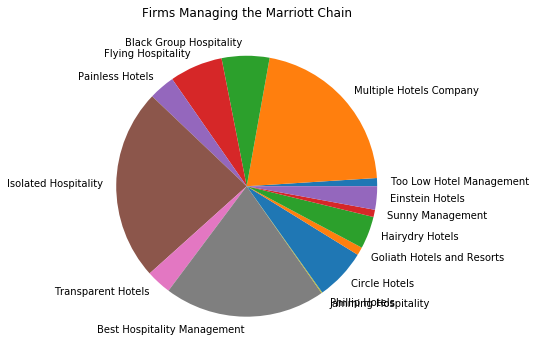

In [131]:
plt.pie([float(v) for v in marriott_dict.values()], labels=list(marriott_dict.keys()), autopct=None)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Firms Managing the Marriott Chain')
plt.show()

In [137]:
hilton_dict = {}
for i in range(len(firm_list)):
    temp = len(us_data.loc[(firm_list[i] == us_data['Management Firm']) & (us_data['Chain_Name'] == 'Hilton')])
    hilton_dict[firm_list[i]] = float(temp)


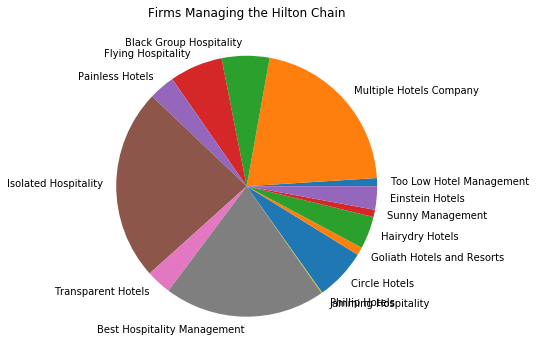

In [133]:
plt.pie([float(v) for v in marriott_dict.values()], labels=list(marriott_dict.keys()), autopct=None)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Firms Managing the Hilton Chain')
plt.show()

In [136]:
indep_dict = {}
for i in range(len(firm_list)):
    temp = len(us_data.loc[(firm_list[i] == us_data['Management Firm']) & (us_data['Chain_Name'] == 'Independent')])
    indep_dict[firm_list[i]] = float(temp)


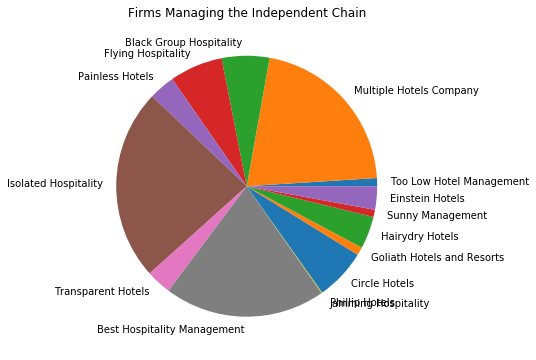

In [135]:
plt.pie([float(v) for v in marriott_dict.values()], labels=list(marriott_dict.keys()), autopct=None)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Firms Managing the Independent Chain')
plt.show()

**Multiple Hotels Company**, Best Hospitality Management and Isolated Hospitality manage an overwhelming majority of Marriott, Hilton and Isolated Hospitality hotels, which only reiterates my position on meeting with Multiple Hotels Company. 

## Conclusion: 

Bob should meet with the following three companies:
#### Multiple Hotels Company:

* Most likely to be successful through existing links between HotelSoft and them through Wyndham in the UK 
* Large market share
* Manage a significant proportion of the biggest hotel chains

#### Sunny Management:
* Manage few hotels, might be highly interested
* Manage a Wyndham hotel with a small number of rooms, which could be a great pilot, setting example for competition

Finally, judging from the analysis above I would recommend to meet with **Best Hospitality Management** representatives, as 

* They manage nearly all Wyndham hotels in the US, so it will be easier to showcase HotelSoft's success from Wyndham hotels in the UK

* They have the largest market share and manage hotels with the average number of rooms that HotelSoft manages successfully in the UK and yet they have a lot of Wyndham hotels with around 60 rooms - a good number of rooms for a pilot

* They also manage a significant proportion of the biggest hotel chains, which is a great opportunity for a potential expansion